In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
%matplotlib inline

# Question 1

The following data comes from a larger set detailing every motor vehicle collision in NYC (https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [2]:
collision_df = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
collision_df.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


a) Factorize the dataset such that all the columns contain floating point values

In [3]:
# Code Here
from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#collision_df.iloc[:, 2] = labelencoder.fit_transform(collision_df.iloc[:, 2])
#collision_df.head()
for c in collision_df.columns[1:]:
    collision_df[c] = pd.factorize(collision_df[c])[0]
collision_df['DATE']=0

In [4]:
collision_df.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,1,1,0,0,0
2,0,0,1,1,2,2,2,2,1,0,...,1,0,0,0,2,2,2,0,0,0
3,0,0,2,2,3,3,3,3,2,0,...,0,0,0,0,3,2,3,0,0,0
4,0,0,1,3,4,4,4,1,0,1,...,0,1,0,0,4,1,1,1,0,0


b) Using DBSCAN(eps=0.1, min_samples=1), find the number of clusters in this dataset.

In [5]:
# Code Here
from sklearn.cluster import DBSCAN
res2 = DBSCAN(eps=0.1, min_samples=1).fit(collision_df)
L2=res2.labels_

In [6]:
# Number of clusters
n_clusters= len(set(res2.labels_)) - (1 if -1 in res2.labels_ else 0)
n_clusters

617

c) Use K = [600, 680] and test if the number of clusters holds using KMeans. (Hint: we will have to use the score() function from KMeans in this case to find duplicates after factorizing the string variables. When we reach the point a score of 0, this means that each unique observation has its own cluster, so n_clusters is equal to the number of unique observations.)

In [15]:
no_obs=0
for n_clusters in range(600,680): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(collision_df)
    #report average Silhouette score
    score=km.score(collision_df)
    if(score==0):
        no_obs=n_clusters
        break
print(no_obs)

617


d) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows (hint: Use drop_duplicates() from pandas). 

In [16]:
# Code here
collision_df.drop_duplicates(inplace=True)
collision_df.shape[0]

617

# Question 2

## Data Guideline
The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015. Stop-and-frisk got increased attention in the 2016 presidential debate.

In [3]:
stop_df = pd.read_csv('data/stop_2012.csv', index_col='zipcode')
stop_df.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [4]:
stop_df.columns

Index(['day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'time_1',
       'time_2', 'time_3', 'time_4', 'time_5', 'time_6'],
      dtype='object')

a) Find the zip code with most stops

In [5]:
# Code Here
#stop_df['zips']=stop_df.index
stop_df=stop_df.apply(pd.to_numeric)
stop_df['total']=stop_df.apply(lambda x:np.sum(x),axis=1)
stop_df.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6,total
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0,5241.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0,3540.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0,4959.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0,3525.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0,18291.0


In [6]:
stop_df.sort_values(by=['total'],ascending=False,inplace=True)
stop_df.head(1)

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6,total
zipcode,,,,,,,,,,,,,,,,,,,,,
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0,18291.0


We will normalize the data using MinMax Scaling

In [7]:
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(stop_df), columns=stop_df.columns, index=stop_df.index)

b) Implement both the elbow method and silhouette method score to decide the number of clusters K. Use the range K = [2, 10] when constructing the visualization. Note that you should be choosing your choice of K for later problems based on the silhouette score.

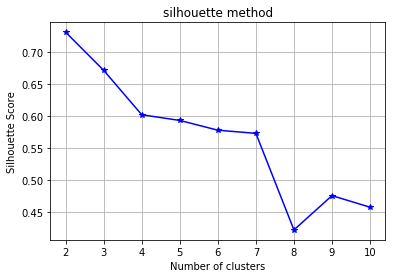

In [22]:
#Code Here
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]
sil_scores=[]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(df_scaled.iloc[:,:-1])
    #report average Silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sil_scores.append(silhouette_avg)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range_n_clusters, sil_scores, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('silhouette method')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.730317375659
For n_clusters = 3 The average silhouette_score is : 0.67007970542
For n_clusters = 4 The average silhouette_score is : 0.599832709886
For n_clusters = 5 The average silhouette_score is : 0.590934229883
For n_clusters = 6 The average silhouette_score is : 0.575684254526
For n_clusters = 7 The average silhouette_score is : 0.570764726435
For n_clusters = 8 The average silhouette_score is : 0.418723290061
For n_clusters = 9 The average silhouette_score is : 0.473233587238
For n_clusters = 10 The average silhouette_score is : 0.454611314999


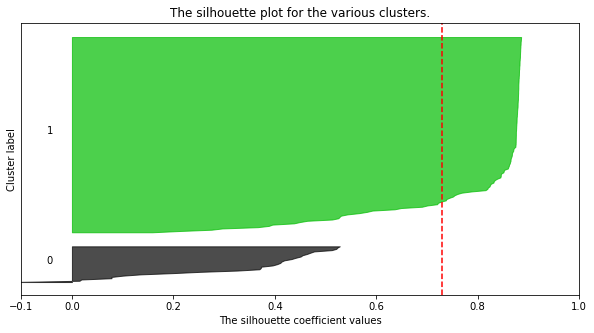

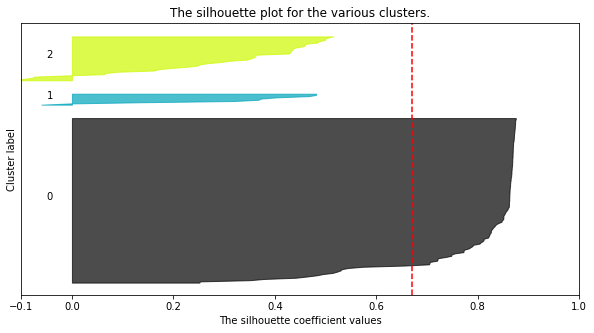

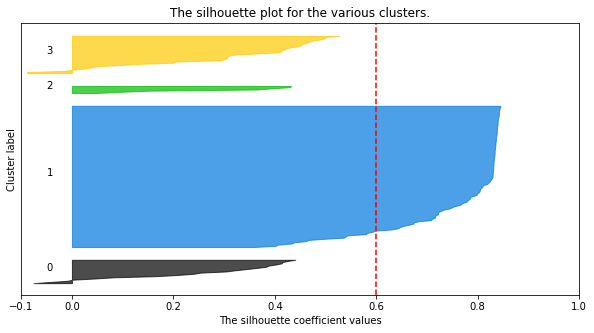

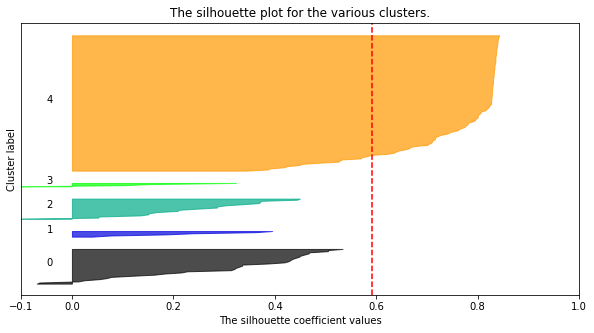

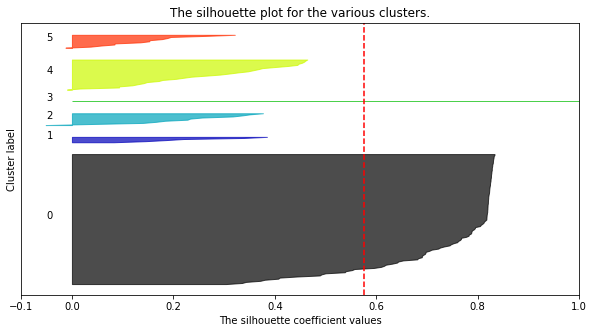

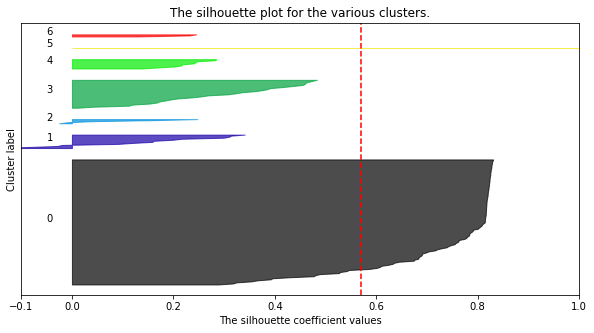

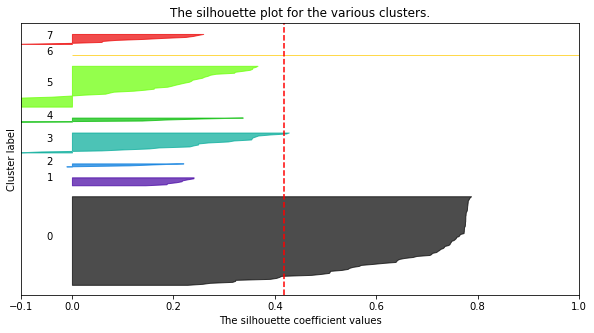

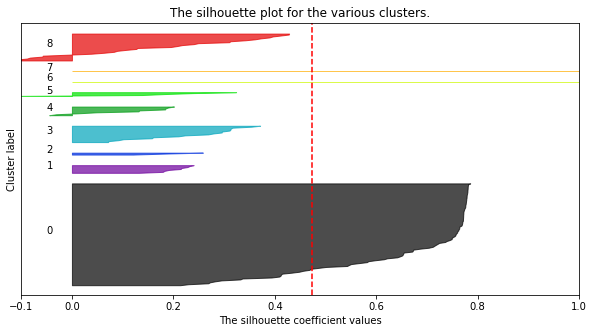

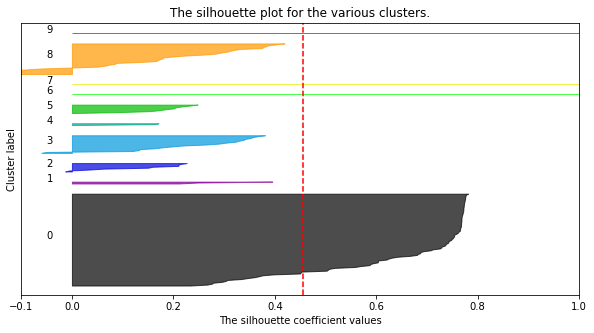

In [23]:
import matplotlib.cm as cm
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
silhouette_score_plot(df_scaled.iloc[:,:-1],range(2,11))

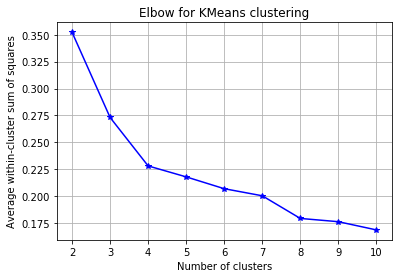

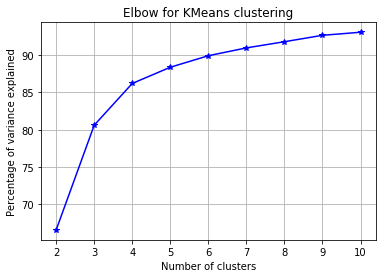

In [25]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
     # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()
elbow(df_scaled.iloc[:,:-1], range(2,11))

c) Use that value of K from (b) for a Gaussian Mixture and KMeans model. Then store the results in a dataframe/dictionary along with the zipcodes it maps to.

In [27]:
# Code Here
n=2 # number of clusters
km=KMeans(n_clusters=n)
res_km=km.fit(df_scaled.iloc[:,:-1])
gm=GMM(n_components=n,random_state=324).fit(df_scaled.iloc[:,:-1])
res_gm=gm.predict(df_scaled.iloc[:,:-1])

In [28]:
#create a dictionary mapping zip codes to cluster labels
km_cluster={df_scaled.index[i]:res_km.labels_[i] for i in range(len(res_km.labels_))}

In [29]:
gm_cluster={df_scaled.index[i]:res_gm[i] for i in range(len(list(res_gm)))}

d) Visualize the results from the Gaussian Mixture Model and KMeans on the map with the function below. Make sure your results from (c) has the right form:
```Python
result = {
    11374: 1,
    11373: 0,
    ...
}
```

1. Make sure your result from (c) is in the correct form
2. Make sure NY.shp, NY.shx, NY.dbf are downloaded in your working directory
3. Use the defined function plot_on_map(your_result)

In [31]:
NYCzip=gpd.read_file('NY.shp')

In [32]:
colors=['green','blue','red','yellow','magenta']
def plot_on_map(gdf,Y): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize zip codes using clusters for picking colors        
    f, ax = plt.subplots(1, figsize=(12, 12))     
    for c in range(max(Y.values())+1): #for each cluster
        gdf.loc[gdf.zipcode.map(Y)==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


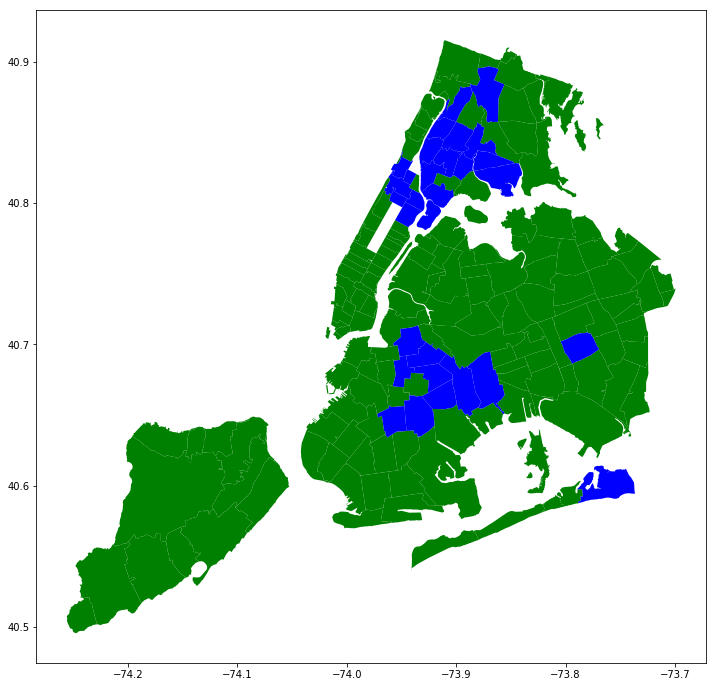

In [33]:
plot_on_map(NYCzip,km_cluster)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


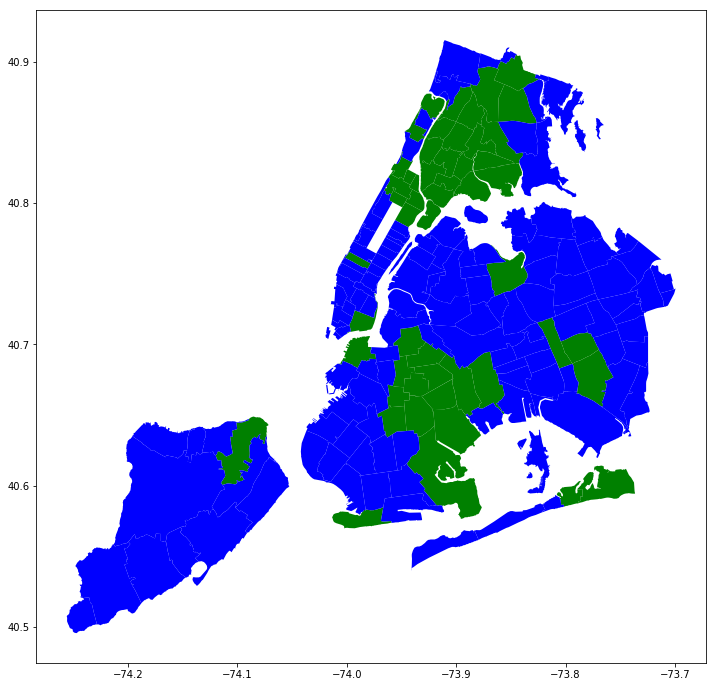

In [34]:
plot_on_map(NYCzip,gm_cluster)